# Data Science Capstone Project
# Can the Ames Housing dataset be used to predict house prices using advanced regression techniques?

Buying and selling a home is an important part of most people's life and can often be a stressful and confusing time. Understanding the true value of a home is paramount in determing when to go forward with a sale. Realtors often use comps of recent sales to set a baseline for the pricing. These calculations often ignore many features of the home and only focus on the location and square footage. This project examines whether or not there is a data driven way of calculating the value of a home using comprehensive features of a home. The dataset used is the Ames housing dataset. It is a modernized and expanded version of the often cited Boston Housing dataset. The dataset includes 79 variables describing residential homes in Ames, Iowa. A Jupyter notebook is included to explore the data, clean it, visualize it, create/evaulate an optimal model, and evaluate the results. A web application is included in this project for testing the generated model.

## Imports and Configuration

In [1]:
import warnings
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import nltk
import math
import re
import json
from nltk.util import ngrams, everygrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn import linear_model, neural_network
from sklearn import ensemble
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ParameterGrid
from scipy.stats import zscore
from time import time
import joblib
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown, display

# configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

/Users/kfrost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 1000

<IPython.core.display.Javascript object>

## Data Understanding

In [3]:
df_data = pd.read_csv('data/data.csv')

In [4]:
df_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Prepare Data

In [7]:
# `MSSubClass` is categorical, so let's convert it to a string
df_data['MSSubClass'] = df_data['MSSubClass'].apply(str)

In [8]:
# Remove extraneous columns
df_data.drop(columns=['Id', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YearRemodAdd'], inplace=True)

In [9]:
# Convert `CentralAir` to int
df_data['CentralAir'] = (df_data['CentralAir'] == 'Y').astype(int)

# Rename `BedroomAbvGr` & `KitchenAbvGr` to match data description file
df_data.rename(columns={'BedroomAbvGr': 'Bedroom', 'KitchenAbvGr': 'Kitchen'}, inplace=True)

In [10]:
# Fix inconsistencies between data file and file description txt file
df_data['MSZoning'] = df_data['MSZoning'].replace('C (all)', 'C')
df_data['Neighborhood'] = df_data['Neighborhood'].replace('NAmes', 'Names')
df_data['BldgType'] = df_data['BldgType'].replace('2fmCon', '2FmCon')
df_data['BldgType'] = df_data['BldgType'].replace('Duplex', 'Duplx')
df_data['BldgType'] = df_data['BldgType'].replace('Twnhs', 'TwnhsI')
df_data['Exterior1st'] = df_data['Exterior1st'].replace('Wd Sdng', 'WdSdng')
df_data['Exterior2nd'] = df_data['Exterior2nd'].replace('Brk Cmn', 'BrkCmn')
df_data['Exterior2nd'] = df_data['Exterior2nd'].replace('CmentBd', 'CemntBd')
df_data['Exterior2nd'] = df_data['Exterior2nd'].replace('Wd Sdng', 'WdSdng')
df_data['Exterior2nd'] = df_data['Exterior2nd'].replace('BrkCmn', 'BrkComm')
df_data['Exterior2nd'] = df_data['Exterior2nd'].replace('Wd Shng', 'WdShing')
df_data['BldgType'] = df_data['BldgType'].replace('Twnhs', 'TwnhsI')

In [11]:
# We want to use 2020 dollar values, so let's adjust for inflation
def priceIn2020(row):
    '''
    This function takes a row from the dataset and converts `SalePrice` to the inflation adjusted value
    
    Parameters:
        row: Dataset row

    Returns:
        inflation adjusted value of `SalePrice` 
    '''
    if row.YrSold == 2006:
        return row.SalePrice * 1.279
    if row.YrSold == 2007:
        return row.SalePrice * 1.243
    if row.YrSold == 2008:
        return row.SalePrice * 1.197
    if row.YrSold == 2009:
        return row.SalePrice * 1.202
    if row.YrSold == 2010:
        return row.SalePrice * 1.182

In [12]:
df_data['SalePrice'] = df_data.apply(priceIn2020, axis = 1)

In [13]:
# Drop YrSold column
df_data.drop(columns=['YrSold'], inplace=True)

In [14]:
# show missing value counts
na_count = df_data.isna().sum(axis=0)
na_count[na_count != 0]

LotFrontage     259 
Alley           1369
MasVnrType      8   
MasVnrArea      8   
BsmtQual        37  
BsmtCond        37  
BsmtExposure    38  
BsmtFinType1    37  
BsmtFinType2    38  
Electrical      1   
FireplaceQu     690 
GarageType      81  
GarageFinish    81  
GarageQual      81  
GarageCond      81  
PoolQC          1453
Fence           1179
dtype: int64

In [15]:
# replace missing lot frontage with median of neighborhood
df_data["LotFrontage"] = df_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# replace missing values
df_data.fillna(value={'MasVnrType': 'None', 'MasVnrArea': 0}, inplace=True)

# fill any remaining na values with `NA`
df_data.fillna('NA', inplace=True)

In [16]:
# show missing value counts
na_count = df_data.isna().sum(axis=0)
na_count[na_count != 0]

Series([], dtype: int64)

In [17]:
# convert all float columns to int
float_col = df_data.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    df_data[col] = df_data[col].astype('int64')

In [18]:
# convert numerical features that are actually categorical
df_data['OverallQual'] = df_data['OverallQual'].apply(str)
df_data['OverallCond'] = df_data['OverallCond'].apply(str)

Text(0.5, 1.0, 'Distribution of Sale Prices')

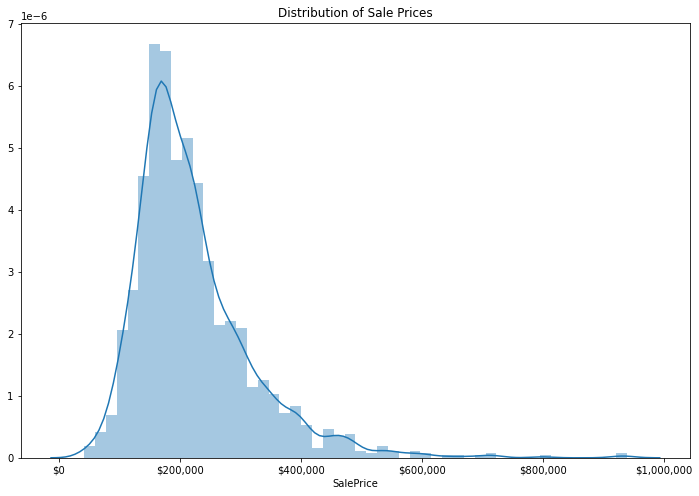

In [19]:
# let's look at a histogram of the sale prices to look for outliers
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df_data['SalePrice'], ax=ax)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set_title('Distribution of Sale Prices')
plt.show()

In [20]:
# `SalePrice` is right skewed
# Let's remove outliers with sale prices greater than 2 standard deviations away from the mean
df_data = df_data[np.abs(zscore(df_data['SalePrice'])) < 2]

Text(0.5, 1.0, 'Distribution of Sale Prices After Removing Outliers')

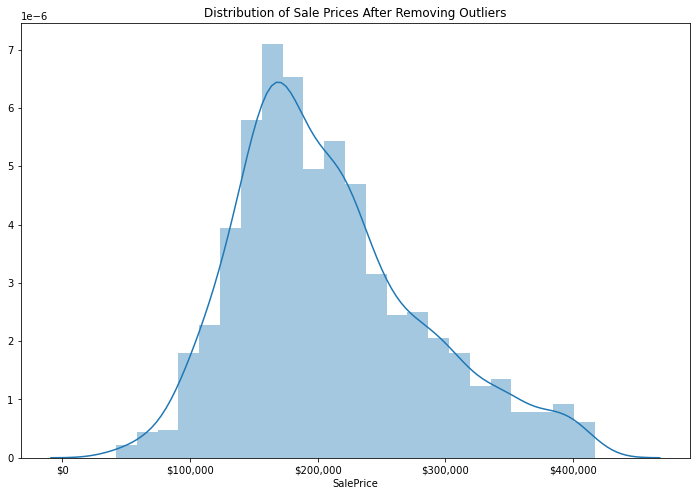

In [21]:
# Let's plot the histogram again to show the changes
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df_data['SalePrice'], ax=ax)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set_title('Distribution of Sale Prices After Removing Outliers')
plt.show()

Text(0.5, 1.0, 'Distribution of Lot Area')

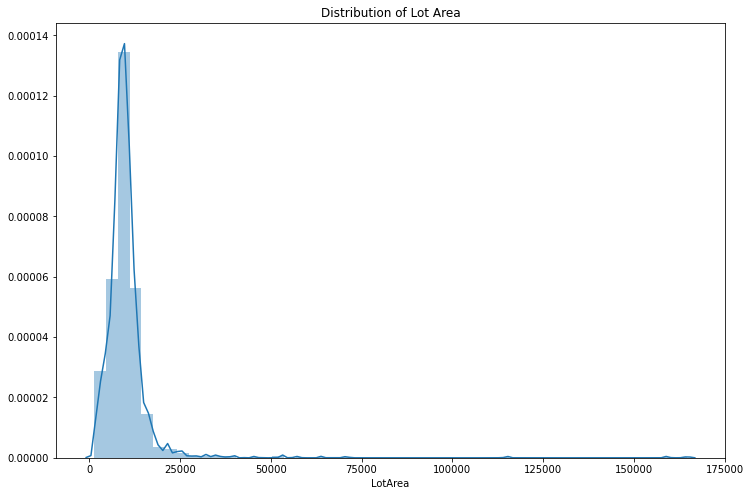

In [22]:
# Let's do the same thing for `LotArea`
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df_data['LotArea'], ax=ax)
ax.set_title('Distribution of Lot Area')
plt.show()

In [23]:
# Woah, LotArea is even more right skewed
# Let's again remove outliers outside 2 standard deviations from the mean
df_data = df_data[np.abs(zscore(df_data['LotArea'])) < 2]

Text(0.5, 1.0, 'Distribution of Lot Area After Removing Outliers')

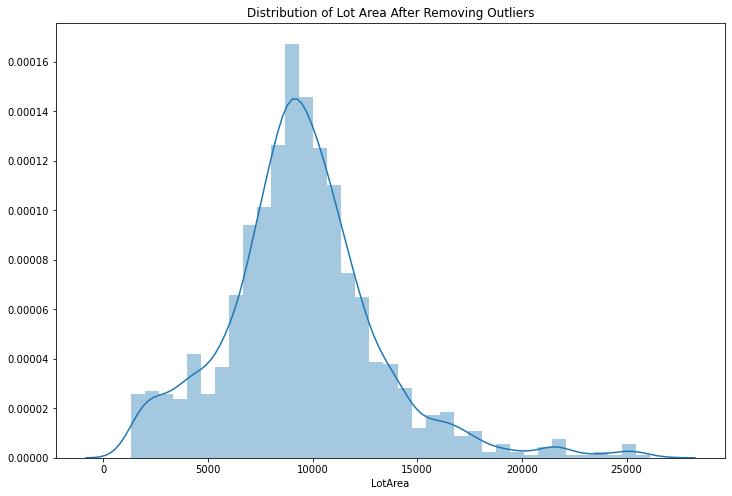

In [24]:
# plot the histogram after the changes
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(df_data['LotArea'], ax=ax)
ax.set_title('Distribution of Lot Area After Removing Outliers')
plt.show()

In [25]:
# remove outliers from other continuous features 
df_data = df_data[np.abs(zscore(df_data['GrLivArea'])) < 2]

Text(0.5, 1.0, 'Above ground living area vs Sales Price')

Text(0.5, 0, 'Sale Price')

Text(0, 0.5, 'Above ground living area (square feet)')

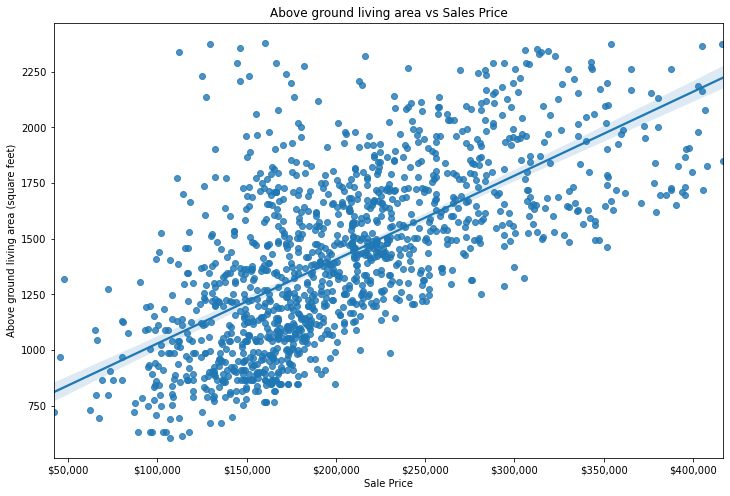

In [26]:
# Above ground living area vs Sales Price
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x="SalePrice", y="GrLivArea", data=df_data, ax=ax)
ax.set_title('Above ground living area vs Sales Price')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Above ground living area (square feet)')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.show()

There appears to be a linear relationship between above ground living area and sales price.

Text(0.5, 1.0, 'Lot Area vs Sales Price')

Text(0.5, 0, 'Sale Price')

Text(0, 0.5, 'Lot Area (square feet)')

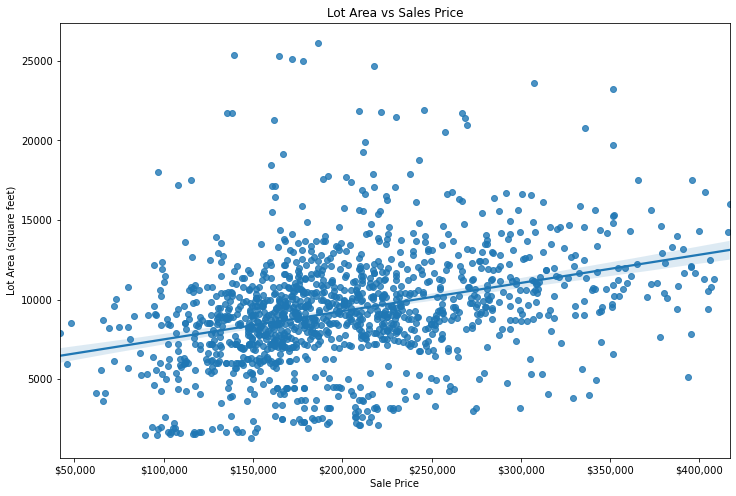

In [27]:
# Lot Area vs Sales Price
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x="SalePrice", y="LotArea", data=df_data, ax=ax)
ax.set_title('Lot Area vs Sales Price')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Lot Area (square feet)')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.show()

There is much more variance in sales price for a given lot area.

Text(0.5, 1.0, 'Year Built vs Sales Price')

Text(0.5, 0, 'Year Built')

Text(0, 0.5, 'Sale Price')

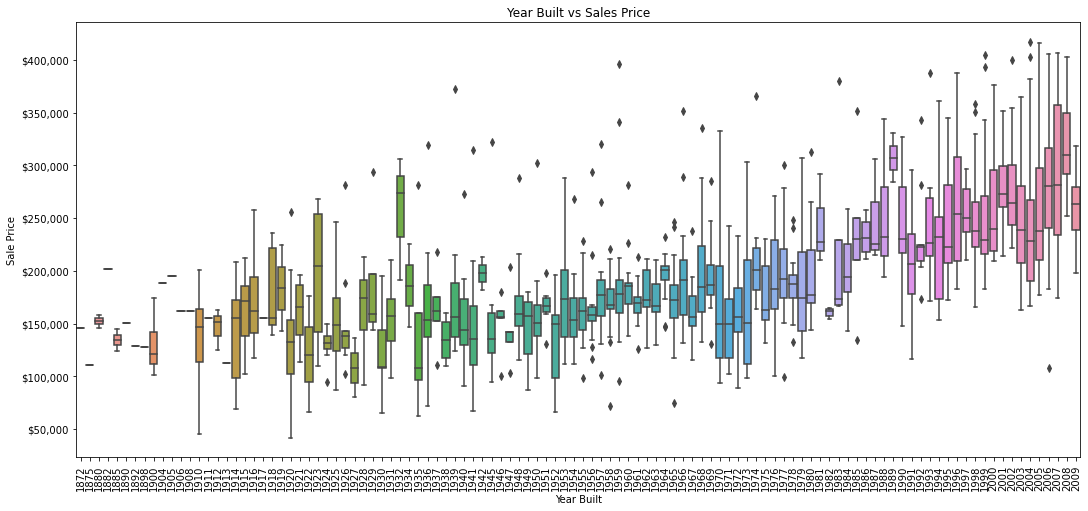

In [28]:
# Year Built vs Sales Price
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(y="SalePrice", x="YearBuilt", data=df_data, ax=ax)
ax.set_title('Year Built vs Sales Price')
ax.set_xlabel('Year Built')
ax.set_ylabel('Sale Price')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

Older houses seem to result in a lower sale price.

Text(0.5, 1.0, 'Overall Condition vs Sales Price')

Text(0.5, 0, 'Overall Condition')

Text(0, 0.5, 'Sale Price')

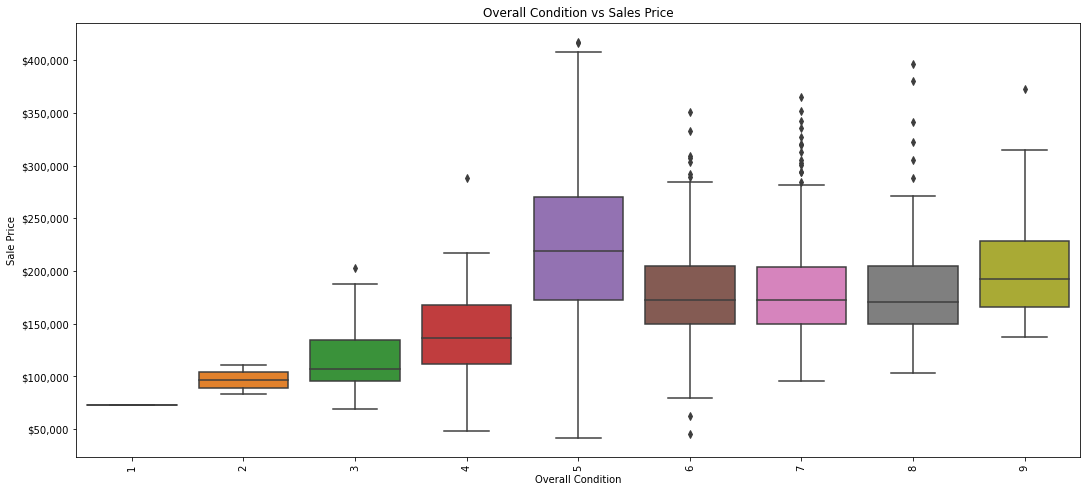

In [29]:
# Year Built vs Sales Price
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(y="SalePrice", x="OverallCond", data=df_data, ax=ax)
ax.set_title('Overall Condition vs Sales Price')
ax.set_xlabel('Overall Condition')
ax.set_ylabel('Sale Price')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

Interesting, there isn't a clear correlation between overall condition and sales price. The rating of 5 actually has the highest median sales price. This could be due to inaccuracies in the polling method or other factors. This might be interesting to explore in more detail in future analysis.

In [30]:
# To better accommodate using the model from a web application, 
# let's process the data description text file and save it to json

f = open('./data/data_description.txt')

# dict for storing parameters
parameters = {}

# current parameter we're processing
currentParam = None

# regex to find parameter rows
paramP = re.compile('^(\S+): (.+)$')

# regex to find value rows
valueP = re.compile('^\s+(\S+)\s+(.+)\s*$')

# for each column that isn't `SalePrice` in the dataframe
for col in df_data.drop(columns=['SalePrice']).columns.values:
    # if the column is a string
    if df_data[col].dtype == 'object':
        # get unique values list
        values = df_data[col].unique().tolist()
        # sort unique values
        values.sort()
        
        # values dictionary
        values_dict = {}
        
        # for each value create an entry in the values dict
        for value in values:
            values_dict[value] = {
                'description': ''
            }
        
        # add a parameter entry in the param dict that includes the unique values and most used value
        parameters[col] = {
            'description': '',
            'type': 'string',
            'values': values_dict,
            'mode': df_data[col].mode()[0]
        }
    # else if it is an integer
    else:
        # add a parameter entry in the param dict that includes the mean value
        parameters[col] = {
            'description': '',
            'type': 'number',
            'mean': int(df_data[col].mean())
        }

line = f.readline()
# for each line in the data description file
while line:
    # check for param matches
    paramM = paramP.match(line)
    # check for value matches
    valueM = valueP.match(line)
    
    # if param row
    if paramM != None:
        # get the current param name
        currentParam = paramM.group(1).strip()
        # check to see if param dict includes the param
        obj = parameters.get(currentParam)
        if obj:            
            # add param description
            obj['description'] = paramM.group(2).strip()
    # else if value row
    elif valueM != None:
        obj = parameters.get(currentParam)
        name = valueM.group(1).strip()
        value = valueM.group(2).strip()
        
        # if param exists in param dict and value exists in values dict
        if obj and obj.get('values') and obj['values'].get(name):
            # add value description
            obj['values'][name]['description'] = value
                
    line = f.readline()

# check if any descriptions are missing for the parameters and values
for paramKey in parameters.keys():
    param = parameters[paramKey]
    if param['description'] == '':
        print(paramKey + ' description missing')
    values = param.get('values')
    if values:
        for valueKey in values.keys():
            if param['values'][valueKey]['description'] == '':
                print('(' + paramKey + ') "' + valueKey + '" description missing')

In [31]:
# save the parameter dict
with open('./models/parameters.json', 'w') as file:
    json_string = json.dumps(parameters, default=lambda o: o.__dict__, sort_keys=True, indent=2)
    file.write(json_string)

29165

## Create a Model

This is a regression problem, so we will focus on model types that are good at generalizing this type of problem. We have selected the follow models to evaluate, given they are useful for regression analysis:

- HuberRegressor
- TheilSenRegressor
- GradientBoostingRegressor
- RandomForestRegressor
- AdaBoostRegressor

In [32]:
# categorical features must be converted to numeric dummy variables before they can be used in our model
df_final = pd.get_dummies(df_data)

In [33]:
# Print the number of features after one-hot encoding
encoded = list(df_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# save final list of columns for use by web application
with open('./models/columns.json', 'w') as file:
    json_string = json.dumps(list(df_final.drop(columns=['SalePrice']).columns), default=lambda o: o.__dict__, sort_keys=True, indent=2)
    file.write(json_string)

319 total features after one-hot encoding.


6504

In [34]:
# split our data set into training and test data
y = df_final['SalePrice']
X = df_final.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 990 samples.
Testing set has 330 samples.


In [38]:
def fit_predict(name, model):
    '''
    This function takes a model, fits/predicts against our training and testing datasets, and prints the metric scores
    
    Parameters:
        name: name of the model for printing
        model: model to test
    '''
    predictions = (model.fit(X_train, y_train)).predict(X_test)

    # Report the scorer results
    print("[" + name + "] Mean absolute error: {:.4f}".format(mean_absolute_error(y_test, predictions)))
    print("[" + name + "] Explained variance score: {:.4f}".format(explained_variance_score(y_test, predictions)))

In [43]:
model_hr = linear_model.HuberRegressor()
fit_predict('HuberRegressor', model_hr)

[HuberRegressor] Mean absolute error: 28645.7134
[HuberRegressor] Explained variance score: 0.6690


In [44]:
model_tsr = linear_model.TheilSenRegressor()
fit_predict('TheilSenRegressor', model_tsr)

[TheilSenRegressor] Mean absolute error: 16422.3780
[TheilSenRegressor] Explained variance score: 0.8734


In [40]:
model_gbr = ensemble.GradientBoostingRegressor()
fit_predict('GradientBoostingRegressor', model_gbr)

[GradientBoostingRegressor] Mean absolute error: 17265.7066
[GradientBoostingRegressor] Explained variance score: 0.8658


In [45]:
model_rfr = ensemble.RandomForestRegressor()
fit_predict('RandomForestRegressor', model_rfr)

[RandomForestRegressor] Mean absolute error: 18778.2564
[RandomForestRegressor] Explained variance score: 0.8431


In [46]:
model_abr = ensemble.AdaBoostRegressor()
fit_predict('AdaBoostRegressor', model_abr)

[AdaBoostRegressor] Mean absolute error: 22949.2128
[AdaBoostRegressor] Explained variance score: 0.7968


It looks like `TheilSenRegressor` is our winner using the default parameters. Let's use `GridSearchCV` to tune the hyperparameters to see if we can further improve the results.

In [47]:
# initialize the classifier

# parameters to use in the grid search to find the best model
parameters = {'max_subpopulation': [100, 1000, 10000],
              'max_iter': [100, 300, 500],
              'tol': [0.01, 0.001, 0.0001]}

pg = ParameterGrid(parameters)
print('Number of permutation to test: ' + str(len(pg)))

tsr = linear_model.TheilSenRegressor()
clf = GridSearchCV(tsr, parameters, n_jobs=4)

# Make predictions using the optimal model
predictions = (clf.fit(X_train, y_train)).predict(X_test)

print('Best Params: ' + str(clf.best_params_))

# Report the scorer results
print("Mean absolute error on testing data: {:.4f}".format(mean_absolute_error(y_test, predictions)))
print("Explained variance score on testing data: {:.4f}".format(explained_variance_score(y_test, predictions)))

Number of permutation to test: 27
Best Params: {'max_iter': 500, 'max_subpopulation': 1000, 'tol': 0.0001}
Mean absolute error on testing data: 16298.2640
Explained variance score on testing data: 0.8739


In [48]:
# dump model for use by web application
joblib.dump(clf, './models/classifier.pkl')

['./models/classifier.pkl']

## Evaluate the Results

The final trained model produced a mean absolute error of 16298.2640. This is 9% of the median sale price. In the real world this means our model has a mean error of approximately $16,300 for each prediction. This number seem reasonable given the smallish dataset (~1500). The explained variance score of 0.8739 shows our model does well in accounting for the variation of our given data set. It accounts for 87.39% of the variance in our test dataset. Our model can be used as a baseline for initially evaluating the price of a house to rule out outliers. In future analysis, we could use a larger dataset or explore other classifier types or ensemble methods to improve the results.